In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta


Calculate the:
- mean optimal energy over non-zero flash grid cells for each hour
- count up the flashes over non-zero grid cells for each hour
- count up the groups over non-zero grid cells for each hour

    -plot on same plot energies and flashes 
    -flash count vs. mean optical energy 
    -add other variable to other y-axis
    -look at bruning and thomas 2015
    -multiplicty (groups/flashes)


# Making new Flash Energy Data

In [2]:
month = "08"
year = "2019"
filename = '/aosc/eos20/djallen/data/lightning/glm/2019/GLMmax_hrly_energy_f.nominalq.UT.t201908.r180W-30W_50S-50N.nc'

ds = xr.open_dataset(
    filename, 
    mask_and_scale=True)

datetime_range = pd.date_range(
    start=f"{year}-{month}-01", 
    freq="1H", 
    periods=len(ds.Days)*len(ds.Hours)
)

datetime_range = datetime_range + timedelta(hours=1)

newdsenergy = ds.where(
    ds['energy_f']!=1.e+15,np.nan).assign_coords(
    coords=dict(
        Longitudes=ds.longitude,
        Latitudes=ds.latitude,
        Datetime=datetime_range,
    )
).drop_vars(
    names=["longitude","latitude","time"]
).stack(Datetime=["Days","Hours"])["energy_f"].assign_attrs(
    missing_value=np.nan).to_dataset(
    name="energy_f").drop_vars("Datetime").assign_coords(
    coords=dict(
        Datetime=datetime_range,
    )
)

newdsenergy

/tmp/ipykernel_1859909/3910645735.py:28: DeprecationWarning: Deleting a single level of a MultiIndex is deprecated. Previously, this deleted all levels of a MultiIndex. Please also drop the following variables: {'Days', 'Hours'} to avoid an error in the future.
  name="energy_f").drop_vars("Datetime").assign_coords(


<xarray.Dataset>
Dimensions:     (Longitudes: 300, Latitudes: 200, Datetime: 744)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-08-01T01:00:00 ... 2019-09-01
Data variables:
    energy_f    (Latitudes, Longitudes, Datetime) float32 0.0 0.0 ... 0.0 0.0

# Plotting Flash Energy

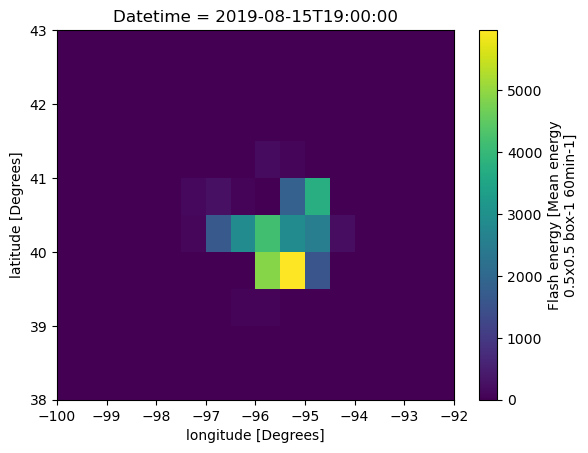

In [3]:
newdsenergy['energy_f'].sel(
    Latitudes=slice(38,43),Longitudes=slice(-100,-92),Datetime='2019-08-15T19:00:00.000000000').plot()

In [4]:
tmp_array = newdsenergy['energy_f'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))

<xarray.DataArray 'energy_f' (Latitudes: 10, Longitudes: 16, Datetime: 7)>
array([[[   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
...
        [   0.     ,    0.     ,    0.    

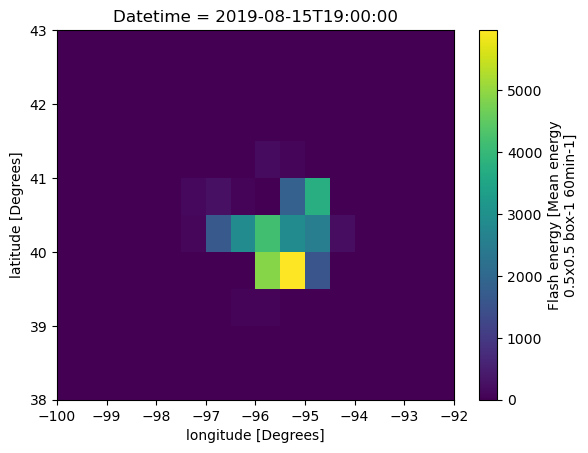

In [5]:
print(tmp_array)
tmp_array.sel(Datetime='2019-08-15T19:00:00.000000000').plot()

Text(0.5, 1.0, 'Hourly Mean Optical Energy 08/15/2019 14z-20z')

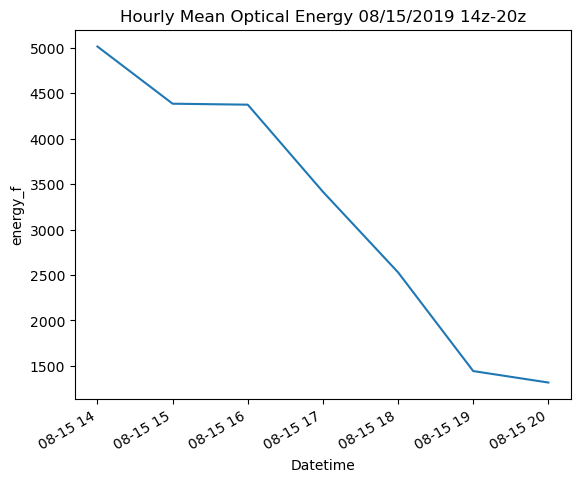

In [6]:
xr.where(tmp_array==0.0,np.nan,tmp_array).mean(["Latitudes","Longitudes"],skipna=True).plot()

plt.title('Hourly Mean Optical Energy 08/15/2019 14z-20z')


###### Making New Flash Count Data

In [7]:
month = "08"
year = "2019"
filename = '/aosc/eos20/djallen/data/lightning/glm/2019/GLMmax_hrly_count_f.nominalq.UT.t201908.r180W-30W_50S-50N.nc'

ds = xr.open_dataset(
    filename, 
    mask_and_scale=True)

datetime_range = pd.date_range(
    start=f"{year}-{month}-01", 
    freq="1H", 
    periods=len(ds.Days)*len(ds.Hours)
)

datetime_range = datetime_range + timedelta(hours=1)

newdscount = ds.where(
    ds['flashes']!=1.e+15,np.nan).assign_coords(
    coords=dict(
        Longitudes=ds.longitude,
        Latitudes=ds.latitude,
        Datetime=datetime_range,
    )
).drop_vars(
    names=["longitude","latitude","time"]
).stack(Datetime=["Days","Hours"])["flashes"].assign_attrs(
    missing_value=np.nan).to_dataset(
    name="flashes").drop_vars("Datetime").assign_coords(
    coords=dict(
        Datetime=datetime_range,
    )
)

newdscount

/tmp/ipykernel_1859909/3226381626.py:28: DeprecationWarning: Deleting a single level of a MultiIndex is deprecated. Previously, this deleted all levels of a MultiIndex. Please also drop the following variables: {'Days', 'Hours'} to avoid an error in the future.
  name="flashes").drop_vars("Datetime").assign_coords(


<xarray.Dataset>
Dimensions:     (Longitudes: 300, Latitudes: 200, Datetime: 744)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-08-01T01:00:00 ... 2019-09-01
Data variables:
    flashes     (Latitudes, Longitudes, Datetime) float32 0.0 0.0 ... 0.0 0.0

# Plotting Flash Count

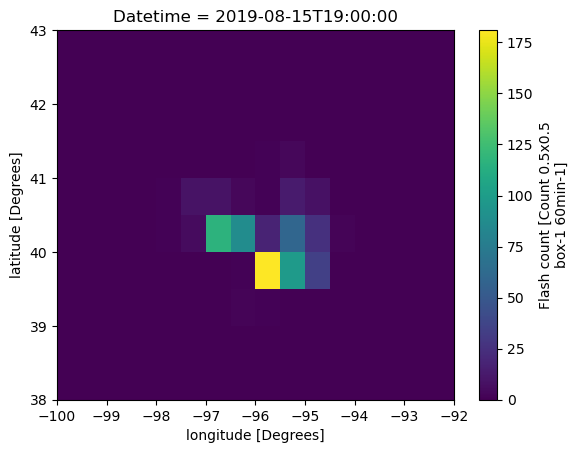

In [8]:
newdscount['flashes'].sel(
    Latitudes=slice(38,43),Longitudes=slice(-100,-92),Datetime='2019-08-15T19:00:00.000000000').plot()

In [9]:
tmp_array = newdscount['flashes'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))

<xarray.DataArray 'flashes' (Latitudes: 10, Longitudes: 16, Datetime: 7)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [

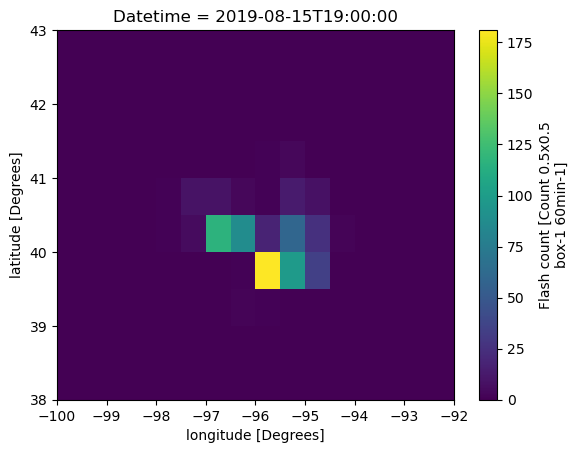

In [10]:
print(tmp_array)
tmp_array.sel(Datetime='2019-08-15T19:00:00.000000000').plot()

In [11]:
xr.where(tmp_array==0.0,np.nan,tmp_array)

<xarray.DataArray 'flashes' (Latitudes: 10, Longitudes: 16, Datetime: 7)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * Longitudes  (Longitudes) float32 -99.75 -99.25 -98.75 ... -92.75 -92.25
  * Latitudes   (Latitudes) float32 38.25 38.75 39.25 ... 41.75 42.25 42.75
  * Datetime    (Datetime) datetime64[ns] 2019-08-15T14:00:00 ... 2019-08-15T...

Text(0.5, 1.0, 'Hourly Flash Count 08/15/2019 14z-20z')

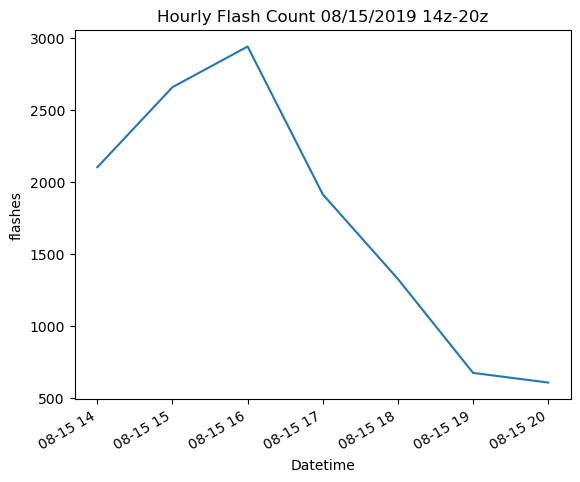

In [12]:
xr.where(tmp_array==0.0,np.nan,tmp_array).sum(["Longitudes","Latitudes"],skipna=True).plot()

plt.title('Hourly Flash Count 08/15/2019 14z-20z')

# Put Flash Counts and Energy together 

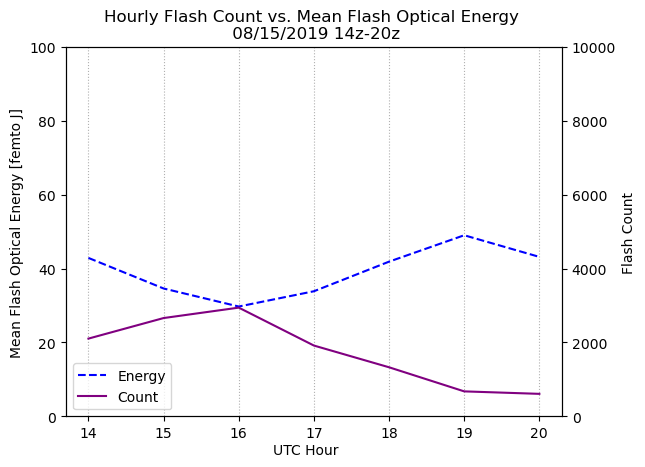

In [13]:
tmp_array1 = newdsenergy['energy_f'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))
tmp1 = xr.where(tmp_array1==0.0,np.nan,tmp_array1).sum(["Longitudes","Latitudes"],skipna=True)

tmp_array2 = newdscount['flashes'].sel(
    Latitudes=slice(38,43),
    Longitudes=slice(-100,-92),
    Datetime=slice('2019-08-15T14:00:00.000000000','2019-08-15T20:00:00.000000000'))
tmp2 = xr.where(tmp_array2==0.0,np.nan,tmp_array2).sum(["Longitudes","Latitudes"],skipna=True)

#mean optical energy
energyavg = tmp1 / tmp2

fig, ax1 = plt.subplots()
 
ls1, = ax1.plot(energyavg, color ='blue',linestyle='--')

ax2 = ax1.twinx()

ls2, = ax2.plot(tmp2, color='purple')

ax1.set_ylim(ymin=0,ymax=100)
ax2.set_ylim(ymin=0,ymax=10000)
#ax3 = "Datetime" #this doesn't do anything

ax1.set_ylabel('Mean Flash Optical Energy [femto J]')
ax2.set_ylabel('Flash Count')

#labels the x-axis
fig.text(0.5, 0.04, 'UTC Hour', ha='center', va='center')

ax1.legend([ls1,ls2],['Energy','Count'], loc='lower left')

ax1.set_title('Hourly Flash Count vs. Mean Flash Optical Energy \n 08/15/2019 14z-20z')

positions = 0,1,2,3,4,5,6,
labels = 14,15,16,17,18,19,20,
plt.xticks(positions, labels) 
 
#plt.grid(alpha=0.5, ls='-')
ax1.xaxis.grid(True, which='major',linestyle='dotted')
#plt.savefig(fname="/Users/erinevans/Desktop/plots/july5ts.png", dpi=200)
plt.savefig(fname="/aosc/eos20/eevans15/amsplots/timeseries/aug15.energyavg.fixed.png", dpi=200, bbox_inches='tight')

plt.show()

#adding mutplicity to plots
#scale the variables 
#ymin + y*range of y 
#max value at the same plot 

In [14]:
print(energyavg)

<xarray.DataArray (Datetime: 7)>
array([42.878185, 34.608055, 29.728672, 33.86016 , 41.87002 , 49.012867,
       43.156597], dtype=float32)
Coordinates:
  * Datetime  (Datetime) datetime64[ns] 2019-08-15T14:00:00 ... 2019-08-15T20...
